**Ryan Skeete**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm # for regression modelling
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings('ignore')

In [3]:
pisa = pd.read_csv('Documents/Research Papers/DATA/PISADATA.csv', encoding='latin 1')

In [4]:
pisa.info()
pisa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ï»¿Year                           322 non-null    int64  
 1   Jurisdiction                      322 non-null    object 
 2   CountryCode                       315 non-null    object 
 3   Region                            308 non-null    object 
 4   ReadingScoreAvg                   310 non-null    object 
 5   ReadingScoreFemaleAvg             310 non-null    object 
 6   ReadingScoreMaleAvg               310 non-null    object 
 7   ReadingPublicSchoolsScoresAvg     268 non-null    object 
 8   ReadingNonPublicSchoolsScoresAvg  266 non-null    object 
 9   ReadingICTYes1                    266 non-null    object 
 10  ReadingICTYes2                    266 non-null    object 
 11  ReadingICTNo                      266 non-null    object 
 12  MathScor

,ï»¿Year,Jurisdiction,CountryCode,Region,ReadingScoreAvg,ReadingScoreFemaleAvg,ReadingScoreMaleAvg,ReadingPublicSchoolsScoresAvg,ReadingNonPublicSchoolsScoresAvg,ReadingICTYes1,...,ScienceICTYes2,ScienceICTNo,PerDiffHeritageLang,HighestOccupParentsStatiusIndex,EconSocCulIndex,GDPperCapPPP,IncomeGroup,GovEducExpPercentGDP,GovExpSecondaryEducPerStudent,Per2parents
0,2018,Selected countries and jurisdictions,NaN,NaN,487,502,472,NaN,NaN,NaN,...,NaN,NaN,14.4,52.3,-0.03,NaN,NaN,NaN,NaN,NaN
1,2018,International Average (OECD),OECD,NaN,487,502,472,495,483,460,...,485,505,14.4,52.3,-0.03,NaN,NaN,NaN,NaN,NaN
2,2018,Australia,AUS,East Asia & Pacific,503,519,487,513,491,477,...,515,521,22.8,55.8,0.32,51036.40589,High Income,NaN,NaN,..
3,2018,Austria,AUT,Europe & Central Asia,484,499,471,501,486,444,...,484,505,22.6,50.8,0.01,56871.21140,High Income,NaN,NaN,87.9
4,2018,Belgium,BEL,Europe & Central Asia,493,504,482,â¡,492,495,...,511,512,20.2,52.4,0.07,52249.57346,High Income,NaN,NaN,73.6


In [5]:
pisa=pisa.rename(columns={'ï»¿Year':'Year'}) # Data Cleaning

In [9]:
 # Converting from character (due to inclusion of unusual characters for missing) to numeric data
pisa['ReadingScoreAvg']=pd.to_numeric(pisa['ReadingScoreAvg'], errors='coerce')

In [10]:
# Converting from character (due to inclusion of unusual characters for missing) to numeric data
pisa[['ReadingScoreFemaleAvg','ReadingScoreMaleAvg']] = pisa[['ReadingScoreFemaleAvg','ReadingScoreMaleAvg']].apply(pd.to_numeric,errors='coerce')

In [11]:
# Converting from character (due to inclusion of unusual characters for missing) to numeric data
pisa[['ReadingPublicSchoolsScoresAvg','ReadingNonPublicSchoolsScoresAvg']] = pisa[['ReadingPublicSchoolsScoresAvg','ReadingNonPublicSchoolsScoresAvg']].apply(pd.to_numeric,errors='coerce')

In [12]:
# Converting from character (due to inclusion of unusual characters for missing) to numeric data
pisa[['ReadingICTYes1','ReadingICTYes2','ReadingICTNo','MathScoresAvg','MathFemaleScoreAvg','MathMaleScoreAvg','MathPublicSchoolsScoresAvg','MathNonPublicSchoolsScoresAvg','MathICTYes1','MathICTYes2','MathICTNo']] = pisa[['ReadingICTYes1','ReadingICTYes2','ReadingICTNo','MathScoresAvg','MathFemaleScoreAvg','MathMaleScoreAvg','MathPublicSchoolsScoresAvg','MathNonPublicSchoolsScoresAvg','MathICTYes1','MathICTYes2','MathICTNo']].apply(pd.to_numeric,errors='coerce')

In [13]:
# Converting from character (due to inclusion of unusual characters for missing) to numeric data
pisa[['ScienceScoreAvg','ScienceFemaleScoreAvg','ScienceMaleScoreAvg','SciencePublicSchoolsScoresAvg','ScienceNonPublicSchoolsScoresAvg','ScienceICTYes1','ScienceICTYes2','ScienceICTNo','PerDiffHeritageLang','HighestOccupParentsStatiusIndex','EconSocCulIndex','GovEducExpPercentGDP','GovExpSecondaryEducPerStudent','Per2parents']] = pisa[['ScienceScoreAvg','ScienceFemaleScoreAvg','ScienceMaleScoreAvg','SciencePublicSchoolsScoresAvg','ScienceNonPublicSchoolsScoresAvg','ScienceICTYes1','ScienceICTYes2','ScienceICTNo','PerDiffHeritageLang','HighestOccupParentsStatiusIndex','EconSocCulIndex','GovEducExpPercentGDP','GovExpSecondaryEducPerStudent','Per2parents']].apply(pd.to_numeric,errors='coerce')

In [14]:
pisa.dtypes

Year                                  int64
Jurisdiction                         object
CountryCode                          object
Region                               object
ReadingScoreAvg                     float64
ReadingScoreFemaleAvg               float64
ReadingScoreMaleAvg                 float64
ReadingPublicSchoolsScoresAvg       float64
ReadingNonPublicSchoolsScoresAvg    float64
ReadingICTYes1                      float64
ReadingICTYes2                      float64
ReadingICTNo                        float64
MathScoresAvg                       float64
MathFemaleScoreAvg                  float64
MathMaleScoreAvg                    float64
MathPublicSchoolsScoresAvg          float64
MathNonPublicSchoolsScoresAvg       float64
MathICTYes1                         float64
MathICTYes2                         float64
MathICTNo                           float64
ScienceScoreAvg                     float64
ScienceFemaleScoreAvg               float64
ScienceMaleScoreAvg             

In [15]:
pisa.head()

,Year,Jurisdiction,CountryCode,Region,ReadingScoreAvg,ReadingScoreFemaleAvg,ReadingScoreMaleAvg,ReadingPublicSchoolsScoresAvg,ReadingNonPublicSchoolsScoresAvg,ReadingICTYes1,...,ScienceICTYes2,ScienceICTNo,PerDiffHeritageLang,HighestOccupParentsStatiusIndex,EconSocCulIndex,GDPperCapPPP,IncomeGroup,GovEducExpPercentGDP,GovExpSecondaryEducPerStudent,Per2parents
0,2018,Selected countries and jurisdictions,NaN,NaN,487.0,502.0,472.0,NaN,NaN,NaN,...,NaN,NaN,14.4,52.3,-0.03,NaN,NaN,NaN,NaN,NaN
1,2018,International Average (OECD),OECD,NaN,487.0,502.0,472.0,495.0,483.0,460.0,...,485.0,505.0,14.4,52.3,-0.03,NaN,NaN,NaN,NaN,NaN
2,2018,Australia,AUS,East Asia & Pacific,503.0,519.0,487.0,513.0,491.0,477.0,...,515.0,521.0,22.8,55.8,0.32,51036.40589,High Income,NaN,NaN,NaN
3,2018,Austria,AUT,Europe & Central Asia,484.0,499.0,471.0,501.0,486.0,444.0,...,484.0,505.0,22.6,50.8,0.01,56871.21140,High Income,NaN,NaN,87.9
4,2018,Belgium,BEL,Europe & Central Asia,493.0,504.0,482.0,NaN,492.0,495.0,...,511.0,512.0,20.2,52.4,0.07,52249.57346,High Income,NaN,NaN,73.6


In [16]:
# we are not intersted in the OECD row
pisa.drop(pisa[pisa['CountryCode']=='OECD'].index,inplace=True)

In [17]:
# This row is not important for our analysis
pisa.drop(pisa[pisa['Jurisdiction']=='Selected countries and jurisdictions'].index,inplace=True)

In [18]:
pisa.head(10)

,Year,Jurisdiction,CountryCode,Region,ReadingScoreAvg,ReadingScoreFemaleAvg,ReadingScoreMaleAvg,ReadingPublicSchoolsScoresAvg,ReadingNonPublicSchoolsScoresAvg,ReadingICTYes1,...,ScienceICTYes2,ScienceICTNo,PerDiffHeritageLang,HighestOccupParentsStatiusIndex,EconSocCulIndex,GDPperCapPPP,IncomeGroup,GovEducExpPercentGDP,GovExpSecondaryEducPerStudent,Per2parents
2,2018,Australia,AUS,East Asia & Pacific,503.0,519.0,487.0,513.0,491.0,477.0,...,515.0,521.0,22.8,55.8,0.32,51036.40589,High Income,NaN,NaN,NaN
3,2018,Austria,AUT,Europe & Central Asia,484.0,499.0,471.0,501.0,486.0,444.0,...,484.0,505.0,22.6,50.8,0.01,56871.21140,High Income,NaN,NaN,87.9
4,2018,Belgium,BEL,Europe & Central Asia,493.0,504.0,482.0,NaN,492.0,495.0,...,511.0,512.0,20.2,52.4,0.07,52249.57346,High Income,NaN,NaN,73.6
5,2018,Brazil,BRA,Latin America & Caribbean,413.0,426.0,400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,42.2,-1.10,14940.67261,Upper middle income,NaN,NaN,NaN
6,2018,B-S-J-G (China),CHN1,East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,B-S-J-Z (China),CHN2,East Asia & Pacific,555.0,562.0,549.0,NaN,NaN,NaN,...,NaN,NaN,0.3,48.7,-0.67,15602.94147,Upper middle income,NaN,NaN,NaN
8,2018,Canada,CAN,North America,520.0,535.0,506.0,522.0,517.0,NaN,...,NaN,NaN,28.5,57.5,0.42,50077.79624,High Income,NaN,NaN,NaN
9,2018,Chile,CHL,Latin America & Caribbean,452.0,462.0,442.0,452.0,454.0,413.0,...,431.0,457.0,6.0,43.9,-0.58,24765.23459,High Income,NaN,NaN,NaN
10,2018,Colombia,COL,Latin America & Caribbean,412.0,417.0,407.0,420.0,409.0,NaN,...,NaN,NaN,4.0,41.6,-1.19,14965.89536,Upper middle income,NaN,NaN,NaN
11,2018,Czech Republic,CZE,Europe & Central Asia,490.0,507.0,474.0,495.0,488.0,453.0,...,489.0,510.0,3.9,49.1,-0.21,40389.35761,High Income,NaN,NaN,85.9


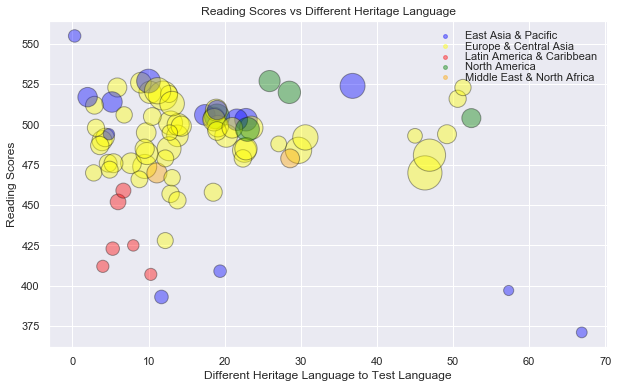

In [19]:
# Bubble plot
sns.set()
pisa.loc[pisa.Region.str.contains('East'),'colors']='blue'
pisa.loc[pisa.Region.str.contains('Europe'),'colors']='yellow'
pisa.loc[pisa.Region.str.contains('Latin'),'colors']='red'
pisa.loc[pisa.Region.str.contains('North'),'colors']='green'
pisa.loc[pisa.Region.str.contains('Middle'),'colors']='orange'

x=pisa.PerDiffHeritageLang
y=pisa.ReadingScoreAvg
GDP=pisa.GDPperCapPPP/100
region=pisa.Region
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c=pisa.colors, cmap='spectral', s=GDP, edgecolor='k', alpha=.4)

color = ['blue','yellow','red','green','orange']
name = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'North America','Middle East & North Africa']

for i in range(5):
    plt.scatter([], [], c=color[i], alpha=0.4, s=15,
                label=name[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.03, loc='upper right')

ax.set_title('Reading Scores vs Different Heritage Language')
ax.set_xlabel('Different Heritage Language to Test Language')
ax.set_ylabel('Reading Scores')
plt.savefig('ReadingScoresVsHeritageLanguage.png')
    
plt.show()

In [20]:
# country with the least reading score
pisa[pisa['ReadingScoreAvg']<375].Jurisdiction

21     Indonesia
297    Indonesia
Name: Jurisdiction, dtype: object

In [21]:
# country with the highest reading score
pisa[(pisa['ReadingScoreAvg']>550) & (pisa['PerDiffHeritageLang']<10)].Jurisdiction

7    B-S-J-Z (China)
Name: Jurisdiction, dtype: object

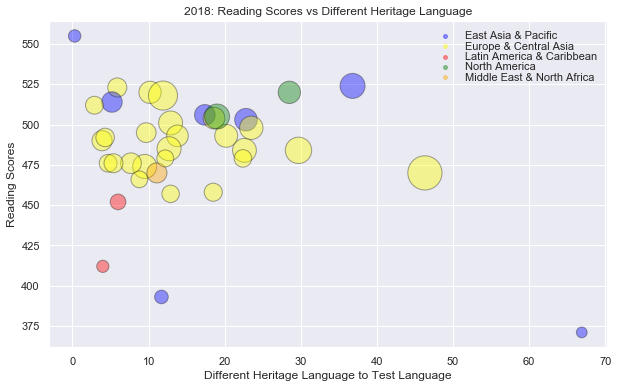

In [22]:
x=pisa[pisa['Year']==2018].PerDiffHeritageLang
y=pisa[pisa['Year']==2018].ReadingScoreAvg
GDP=pisa[pisa['Year']==2018].GDPperCapPPP/100


fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, s=GDP,c=pisa[pisa['Year']==2018].colors, cmap='spectral',edgecolor='k', alpha=.4)

color = ['blue','yellow','red','green','orange']
name = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'North America','Middle East & North Africa']

for i in range(5):
    plt.scatter([], [], c=color[i], alpha=0.4, s=15,
                label=name[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.03, loc='upper right')


ax.set_title('2018: Reading Scores vs Different Heritage Language')
ax.set_xlabel('Different Heritage Language to Test Language')
ax.set_ylabel('Reading Scores')

    
plt.show()

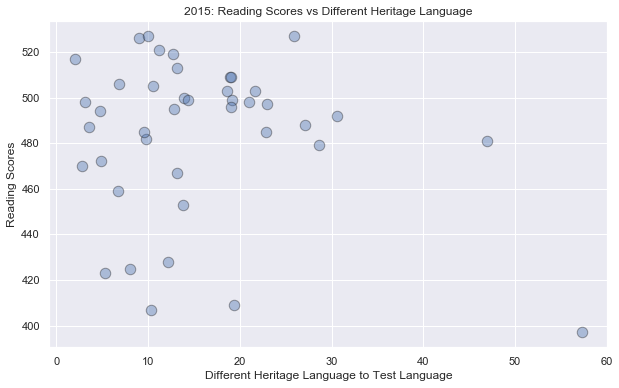

In [23]:
#Scatter plot
x=pisa[pisa['Year']==2015].PerDiffHeritageLang
y=pisa[pisa['Year']==2015].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)


ax.set_title('2015: Reading Scores vs Different Heritage Language')
ax.set_xlabel('Different Heritage Language to Test Language')
ax.set_ylabel('Reading Scores')

    
plt.show()


**Negative relationship between heritage language and english scores**

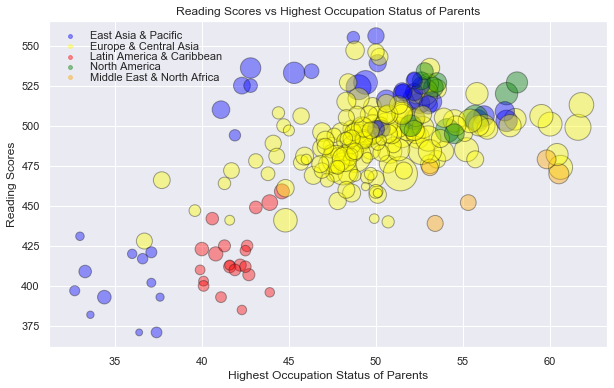

In [24]:
x=pisa.HighestOccupParentsStatiusIndex
y=pisa.ReadingScoreAvg

GDP=pisa.GDPperCapPPP/100 # re-scale GDP so that bubble sizes are reasonable


fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, s=GDP,c=pisa.colors, cmap='spectral',edgecolor='k', alpha=.4)

color = ['blue','yellow','red','green','orange']
name = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'North America','Middle East & North Africa']

for i in range(5):
    plt.scatter([], [], c=color[i], alpha=0.4, s=15,
                label=name[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.03, loc='upper left')



ax.set_title('Reading Scores vs Highest Occupation Status of Parents')
ax.set_xlabel('Highest Occupation Status of Parents')
ax.set_ylabel('Reading Scores')

plt.savefig('ReadingScoresVsHighestOccupationStatus.png')    
plt.show()

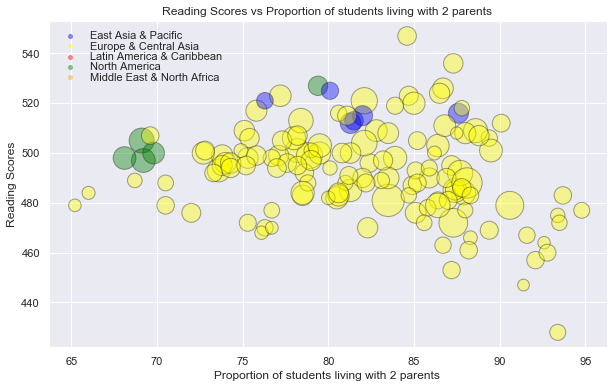

In [25]:
x=pisa.Per2parents
y=pisa.ReadingScoreAvg

GDP=pisa.GDPperCapPPP/100


fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, s=GDP,c=pisa.colors, cmap='spectral',edgecolor='k', alpha=.4)

color = ['blue','yellow','red','green','orange']
name = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'North America','Middle East & North Africa']

for i in range(5):
    plt.scatter([], [], c=color[i], alpha=0.4, s=15,
                label=name[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.03, loc='upper left')



ax.set_title('Reading Scores vs Proportion of students living with 2 parents ')
ax.set_xlabel('Proportion of students living with 2 parents ')
ax.set_ylabel('Reading Scores')

plt.savefig('ReadingScoresVsProportionofStudentslivingwithParents.png')    
plt.show()

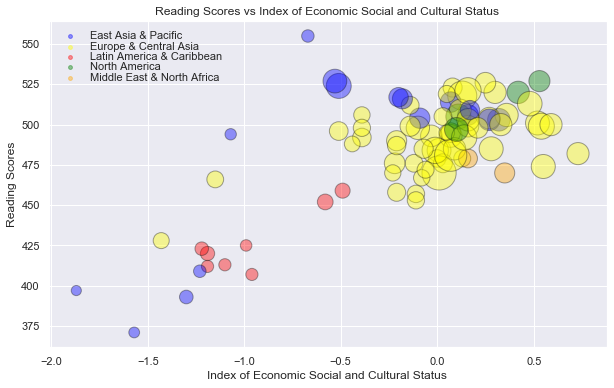

In [26]:
x=pisa.EconSocCulIndex
y=pisa.ReadingScoreAvg

GDP=pisa.GDPperCapPPP/100


fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, s=GDP,c=pisa.colors, cmap='spectral',edgecolor='k', alpha=.4)

color = ['blue','yellow','red','green','orange']
name = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'North America','Middle East & North Africa']

for i in range(5):
    plt.scatter([], [], c=color[i], alpha=0.4, s=15,
                label=name[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.03, loc='upper left')



ax.set_title('Reading Scores vs Index of Economic Social and Cultural Status ')
ax.set_xlabel('Index of Economic Social and Cultural Status ')
ax.set_ylabel('Reading Scores')

plt.savefig('ReadingScoresVsIndexofEconomicSocialandCulturalStatus.png')    
plt.show()

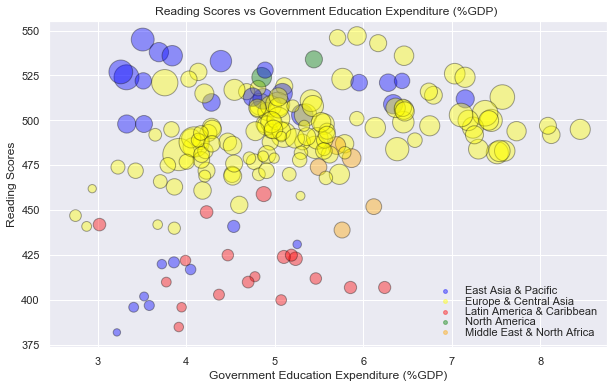

In [27]:
x=pisa.GovEducExpPercentGDP
y=pisa.ReadingScoreAvg

GDP=pisa.GDPperCapPPP/100


fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, s=GDP,c=pisa.colors, cmap='spectral',edgecolor='k', alpha=.4)

color = ['blue','yellow','red','green','orange']
name = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'North America','Middle East & North Africa']

for i in range(5):
    plt.scatter([], [], c=color[i], alpha=0.4, s=15,
                label=name[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.03, loc='lower right')



ax.set_title('Reading Scores vs Government Education Expenditure (%GDP) ')
ax.set_xlabel('Government Education Expenditure (%GDP)')
ax.set_ylabel('Reading Scores')

plt.savefig('ReadingScoresVsGovernmentEducationExpenditure.png')    
plt.show()

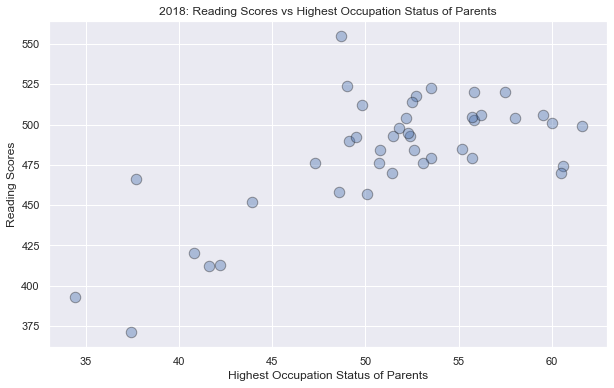

In [28]:
#Scatter plot
x=pisa[pisa['Year']==2018].HighestOccupParentsStatiusIndex
y=pisa[pisa['Year']==2018].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)


ax.set_title('2018: Reading Scores vs Highest Occupation Status of Parents')
ax.set_xlabel('Highest Occupation Status of Parents')
ax.set_ylabel('Reading Scores')

    
plt.show()

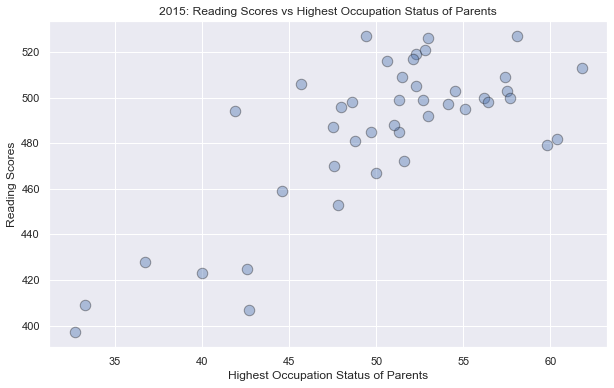

In [29]:
x=pisa[pisa['Year']==2015].HighestOccupParentsStatiusIndex
y=pisa[pisa['Year']==2015].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)


ax.set_title('2015: Reading Scores vs Highest Occupation Status of Parents')
ax.set_xlabel('Highest Occupation Status of Parents')
ax.set_ylabel('Reading Scores')

    
plt.show()

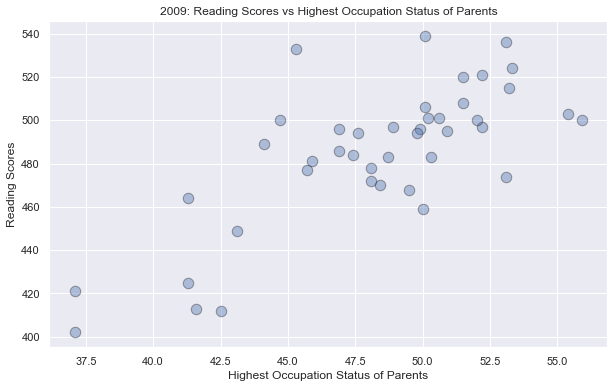

In [30]:
x=pisa[pisa['Year']==2009].HighestOccupParentsStatiusIndex
y=pisa[pisa['Year']==2009].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2009: Reading Scores vs Highest Occupation Status of Parents')
ax.set_xlabel('Highest Occupation Status of Parents')
ax.set_ylabel('Reading Scores')

    
plt.show()

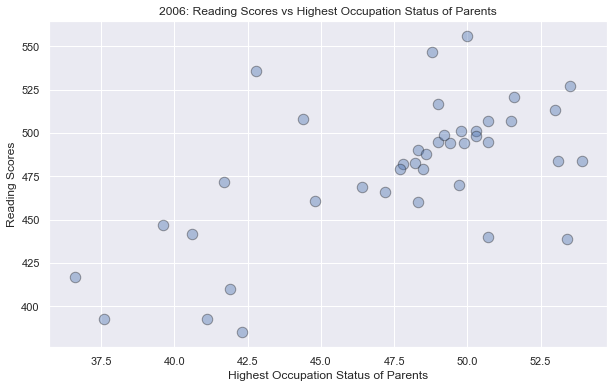

In [31]:
x=pisa[pisa['Year']==2006].HighestOccupParentsStatiusIndex
y=pisa[pisa['Year']==2006].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)


ax.set_title('2006: Reading Scores vs Highest Occupation Status of Parents')
ax.set_xlabel('Highest Occupation Status of Parents')
ax.set_ylabel('Reading Scores')

    
plt.show()

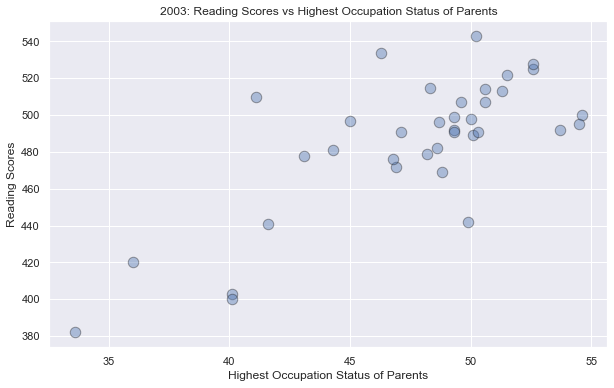

In [32]:
x=pisa[pisa['Year']==2003].HighestOccupParentsStatiusIndex
y=pisa[pisa['Year']==2003].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)


ax.set_title('2003: Reading Scores vs Highest Occupation Status of Parents')
ax.set_xlabel('Highest Occupation Status of Parents')
ax.set_ylabel('Reading Scores')

    
plt.show()

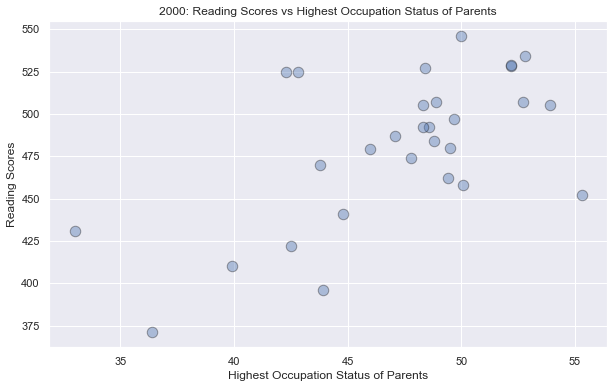

In [33]:
x=pisa[pisa['Year']==2000].HighestOccupParentsStatiusIndex
y=pisa[pisa['Year']==2000].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)


ax.set_title('2000: Reading Scores vs Highest Occupation Status of Parents')
ax.set_xlabel('Highest Occupation Status of Parents')
ax.set_ylabel('Reading Scores')

    
plt.show()

**There is a positive relationship between reading scores and highest occupation status of the parents**

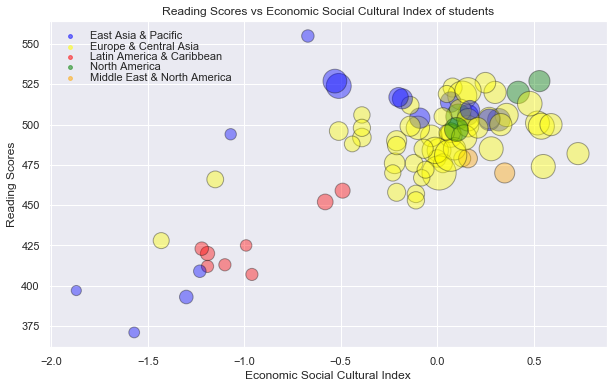

In [34]:
x=pisa.EconSocCulIndex
y=pisa.ReadingScoreAvg
GDP=pisa.GDPperCapPPP/100
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c=pisa.colors, cmap='spectral', s=GDP, edgecolor='k', alpha=.4)

color = ['blue','yellow','red','green','orange']
name = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'North America','Middle East & North America']

for i in range(5):
    plt.scatter([], [], c=color[i], alpha=0.5, s=15,
                label=name[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.03, loc='upper left')

ax.set_title('Reading Scores vs Economic Social Cultural Index of students')
ax.set_xlabel('Economic Social Cultural Index')
ax.set_ylabel('Reading Scores')

    
plt.show()


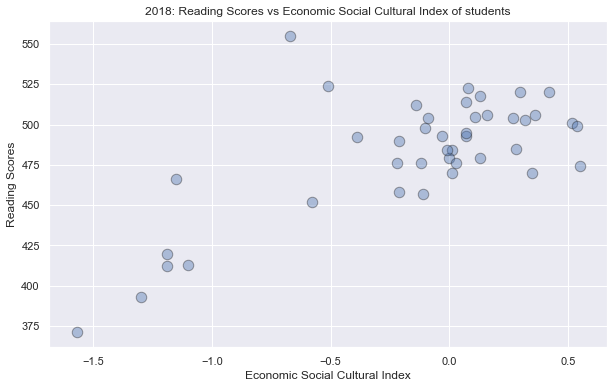

In [35]:
x=pisa[pisa['Year']==2018].EconSocCulIndex
y=pisa[pisa['Year']==2018].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2018: Reading Scores vs Economic Social Cultural Index of students')
ax.set_xlabel('Economic Social Cultural Index')
ax.set_ylabel('Reading Scores')

    
plt.show()

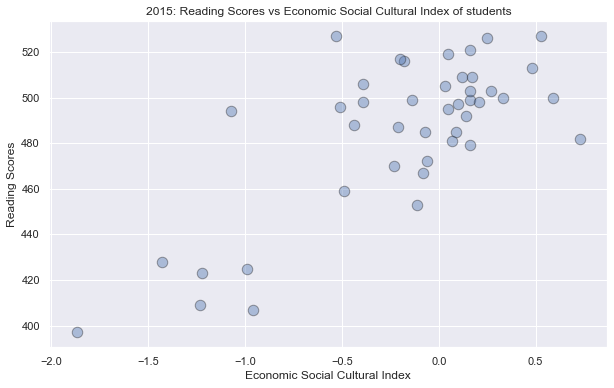

In [36]:
x=pisa[pisa['Year']==2015].EconSocCulIndex
y=pisa[pisa['Year']==2015].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2015: Reading Scores vs Economic Social Cultural Index of students')
ax.set_xlabel('Economic Social Cultural Index')
ax.set_ylabel('Reading Scores')

    
plt.show()

**Positive relationship between the economic and social index of students and their reading scores**

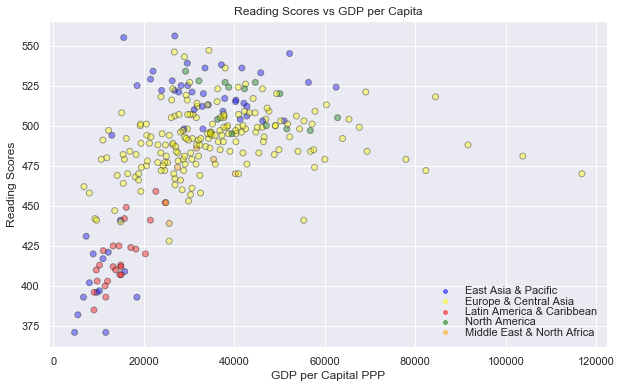

In [37]:
x=pisa.GDPperCapPPP
y=pisa.ReadingScoreAvg

region=pisa.Region
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c=pisa.colors, cmap='spectral', edgecolor='k', alpha=.4)

color = ['blue','yellow','red','green','orange']
name = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'North America','Middle East & North Africa']

for i in range(5):
    plt.scatter([], [], c=color[i], alpha=0.5, s=15,
                label=name[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.03, loc='lower right')

ax.set_title('Reading Scores vs GDP per Capita')
ax.set_xlabel('GDP per Capital PPP')
ax.set_ylabel('Reading Scores')

    
plt.show()


In [38]:

pisa[pisa['GDPperCapPPP']>75000].Jurisdiction

22        Ireland
29     Luxembourg
75     Luxembourg
121    Luxembourg
167    Luxembourg
213    Luxembourg
Name: Jurisdiction, dtype: object

**Luxembourg reading scores are relatively low given its extremely high income**

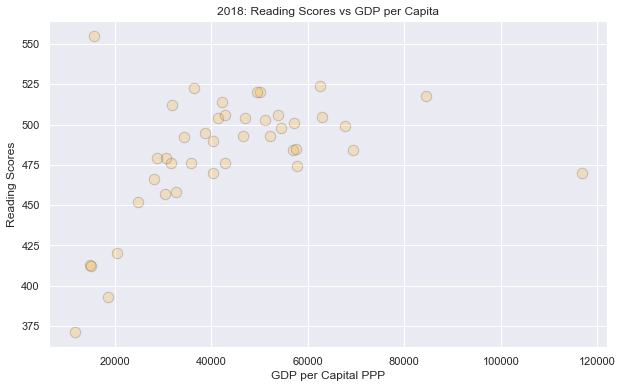

In [39]:
x=pisa[pisa['Year']==2018].GDPperCapPPP
y=pisa[pisa['Year']==2018].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.2, s=110)

ax.set_title('2018: Reading Scores vs GDP per Capita')
ax.set_xlabel('GDP per Capital PPP')
ax.set_ylabel('Reading Scores')

    
plt.show()

In [40]:

pisa[pisa['GDPperCapPPP']>80000].Jurisdiction

22        Ireland
29     Luxembourg
75     Luxembourg
121    Luxembourg
167    Luxembourg
Name: Jurisdiction, dtype: object

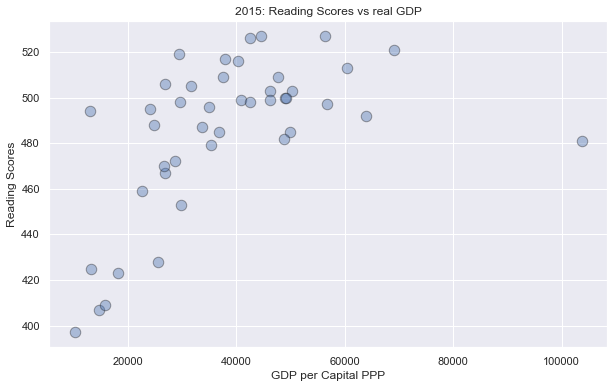

In [41]:
x=pisa[pisa['Year']==2015].GDPperCapPPP
y=pisa[pisa['Year']==2015].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2015: Reading Scores vs real GDP')
ax.set_xlabel('GDP per Capital PPP')
ax.set_ylabel('Reading Scores')

    
plt.show()

In [42]:
pisa[pisa['GDPperCapPPP']>100000].Jurisdiction

29    Luxembourg
75    Luxembourg
Name: Jurisdiction, dtype: object

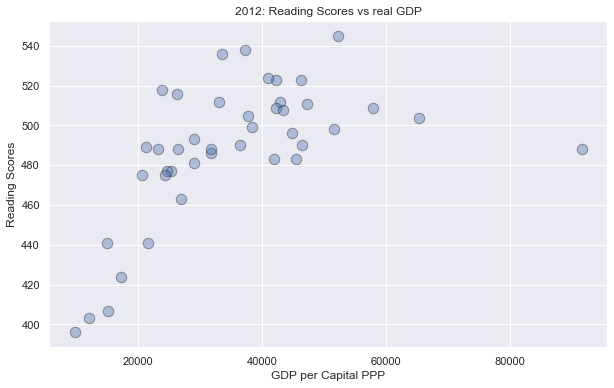

In [43]:
x=pisa[pisa['Year']==2012].GDPperCapPPP
y=pisa[pisa['Year']==2012].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2012: Reading Scores vs real GDP')
ax.set_xlabel('GDP per Capital PPP')
ax.set_ylabel('Reading Scores')

    
plt.show()

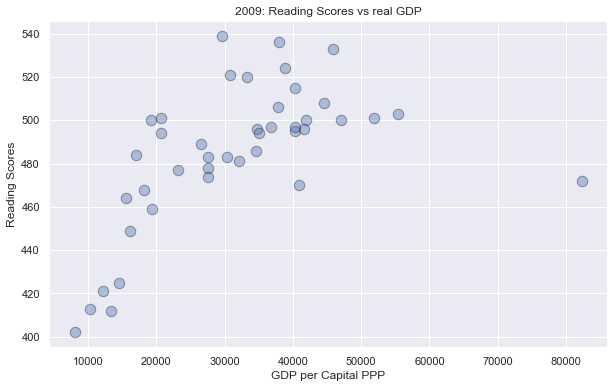

In [44]:
x=pisa[pisa['Year']==2009].GDPperCapPPP
y=pisa[pisa['Year']==2009].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2009: Reading Scores vs real GDP')
ax.set_xlabel('GDP per Capital PPP')
ax.set_ylabel('Reading Scores')

    
plt.show()

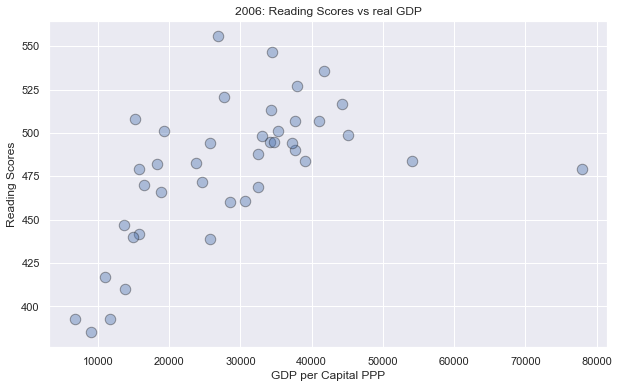

In [45]:
x=pisa[pisa['Year']==2006].GDPperCapPPP
y=pisa[pisa['Year']==2006].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2006: Reading Scores vs real GDP')
ax.set_xlabel('GDP per Capital PPP')
ax.set_ylabel('Reading Scores')

    
plt.show()

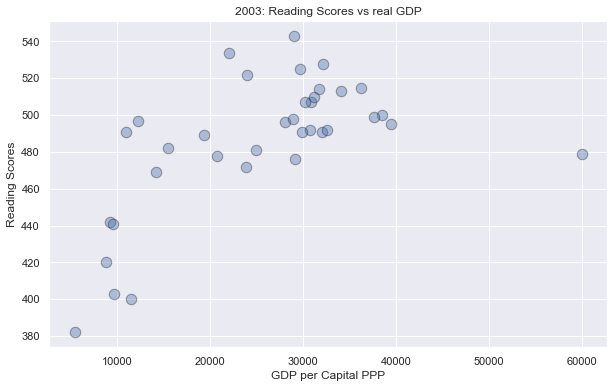

In [46]:
x=pisa[pisa['Year']==2003].GDPperCapPPP
y=pisa[pisa['Year']==2003].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2003: Reading Scores vs real GDP')
ax.set_xlabel('GDP per Capital PPP')
ax.set_ylabel('Reading Scores')

    
plt.show()

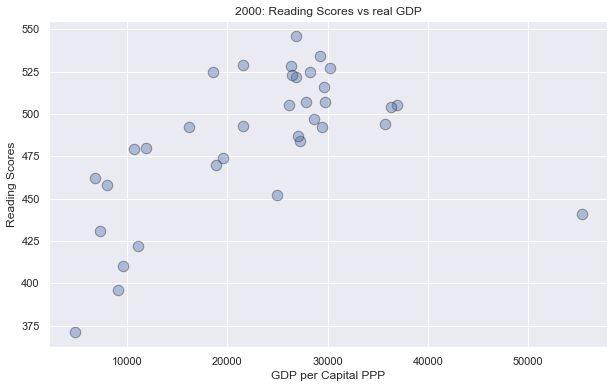

In [47]:
x=pisa[pisa['Year']==2000].GDPperCapPPP
y=pisa[pisa['Year']==2000].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2000: Reading Scores vs real GDP')
ax.set_xlabel('GDP per Capital PPP')
ax.set_ylabel('Reading Scores')

    
plt.show()

**positive relationship between reading scores and real GDP, note tha Luxemburg is an outlier in this regard.**

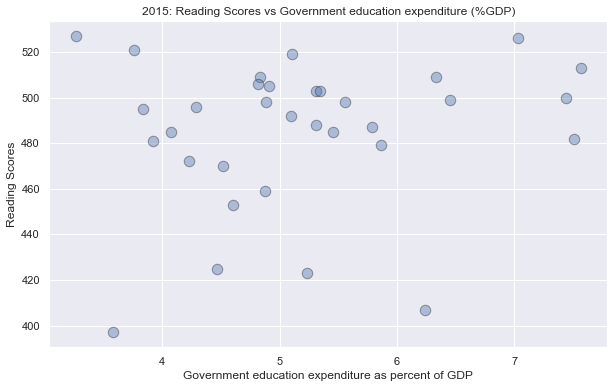

In [48]:
x=pisa[pisa['Year']==2015].GovEducExpPercentGDP
y=pisa[pisa['Year']==2015].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2015: Reading Scores vs Government education expenditure (%GDP)')
ax.set_xlabel('Government education expenditure as percent of GDP')
ax.set_ylabel('Reading Scores')

    
plt.show()

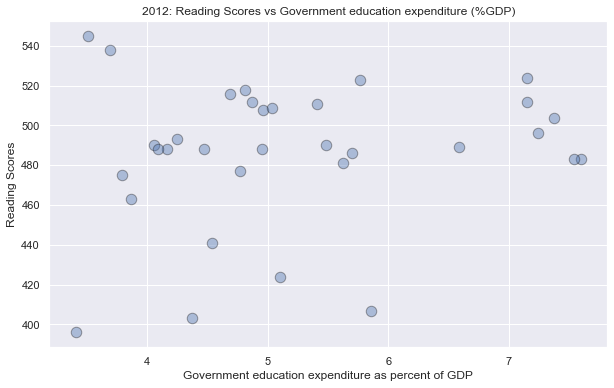

In [49]:
x=pisa[pisa['Year']==2012].GovEducExpPercentGDP
y=pisa[pisa['Year']==2012].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2012: Reading Scores vs Government education expenditure (%GDP)')
ax.set_xlabel('Government education expenditure as percent of GDP')
ax.set_ylabel('Reading Scores')

    
plt.show()

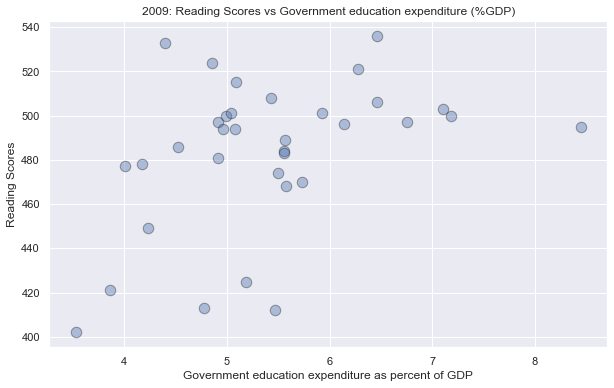

In [50]:
x=pisa[pisa['Year']==2009].GovEducExpPercentGDP
y=pisa[pisa['Year']==2009].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2009: Reading Scores vs Government education expenditure (%GDP)')
ax.set_xlabel('Government education expenditure as percent of GDP')
ax.set_ylabel('Reading Scores')

    
plt.show()

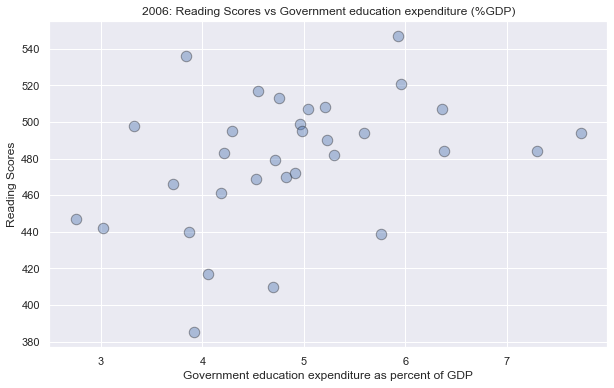

In [51]:
x=pisa[pisa['Year']==2006].GovEducExpPercentGDP
y=pisa[pisa['Year']==2006].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2006: Reading Scores vs Government education expenditure (%GDP)')
ax.set_xlabel('Government education expenditure as percent of GDP')
ax.set_ylabel('Reading Scores')

    
plt.show()

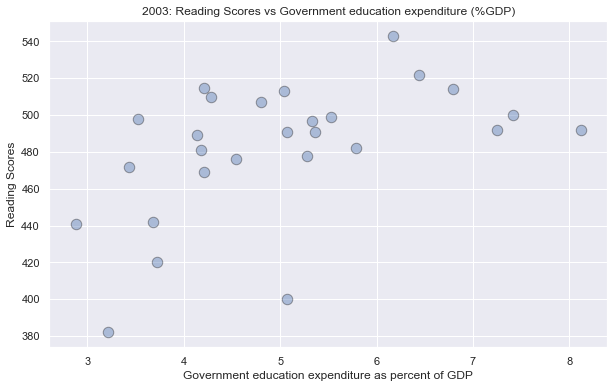

In [52]:
x=pisa[pisa['Year']==2003].GovEducExpPercentGDP
y=pisa[pisa['Year']==2003].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2003: Reading Scores vs Government education expenditure (%GDP)')
ax.set_xlabel('Government education expenditure as percent of GDP')
ax.set_ylabel('Reading Scores')

    
plt.show()

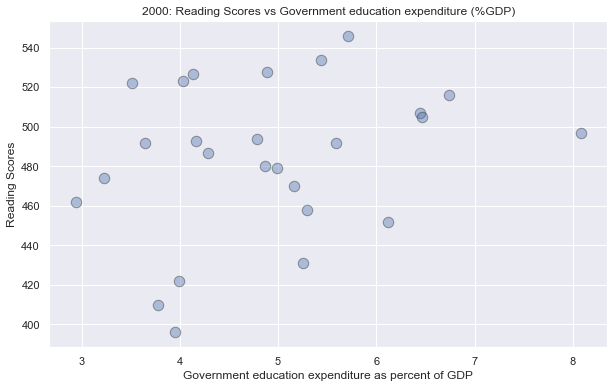

In [53]:
x=pisa[pisa['Year']==2000].GovEducExpPercentGDP
y=pisa[pisa['Year']==2000].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='b', edgecolor='k', alpha=.4, s=110)

ax.set_title('2000: Reading Scores vs Government education expenditure (%GDP)')
ax.set_xlabel('Government education expenditure as percent of GDP')
ax.set_ylabel('Reading Scores')

    
plt.show()

**Weak positive relationship between reading scores and Government expenditure as a percentage of GDP**

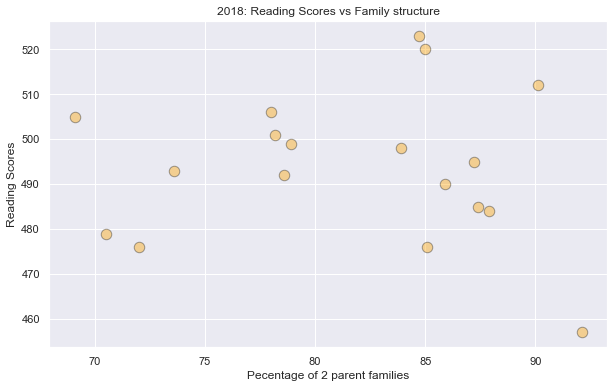

In [54]:
x=pisa[pisa['Year']==2018].Per2parents
y=pisa[pisa['Year']==2018].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2018: Reading Scores vs Family structure')
ax.set_xlabel('Pecentage of 2 parent families')
ax.set_ylabel('Reading Scores')

    
plt.show()

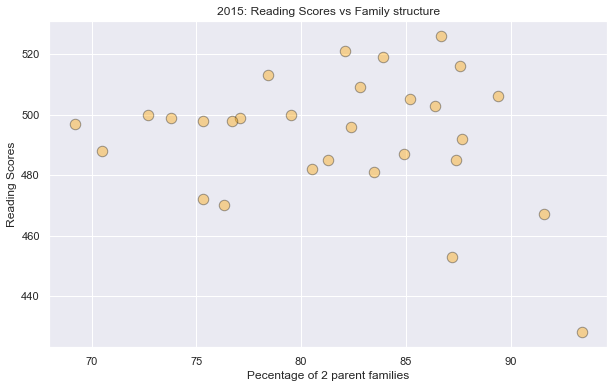

In [55]:
x=pisa[pisa['Year']==2015].Per2parents
y=pisa[pisa['Year']==2015].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2015: Reading Scores vs Family structure')
ax.set_xlabel('Pecentage of 2 parent families')
ax.set_ylabel('Reading Scores')

    
plt.show()

In [56]:
pisa[(pisa['Per2parents']>90) & (pisa['Year']==2015)].Jurisdiction

63    Greece
89    Turkey
Name: Jurisdiction, dtype: object

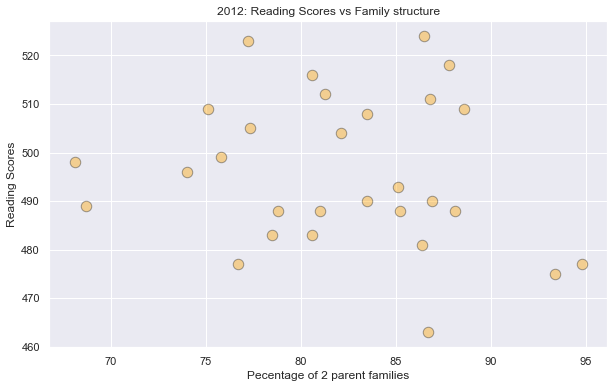

In [57]:
x=pisa[pisa['Year']==2012].Per2parents
y=pisa[pisa['Year']==2012].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2012: Reading Scores vs Family structure')
ax.set_xlabel('Pecentage of 2 parent families')
ax.set_ylabel('Reading Scores')

    
plt.show()

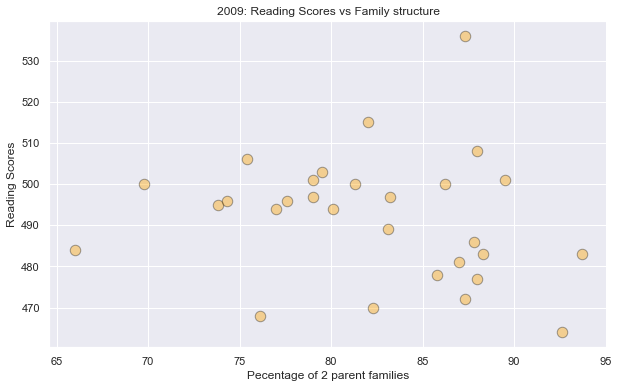

In [58]:
x=pisa[pisa['Year']==2009].Per2parents
y=pisa[pisa['Year']==2009].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2009: Reading Scores vs Family structure')
ax.set_xlabel('Pecentage of 2 parent families')
ax.set_ylabel('Reading Scores')

    
plt.show()

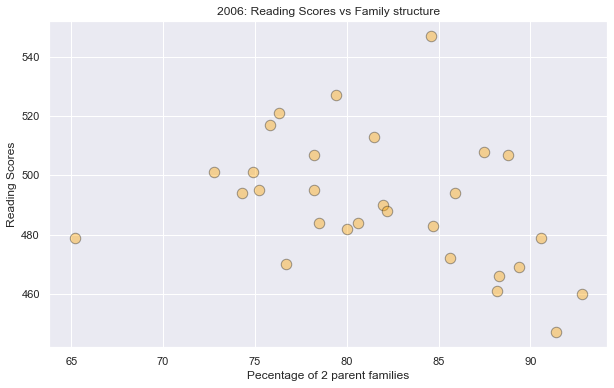

In [59]:
x=pisa[pisa['Year']==2006].Per2parents
y=pisa[pisa['Year']==2006].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2006: Reading Scores vs Family structure')
ax.set_xlabel('Pecentage of 2 parent families')
ax.set_ylabel('Reading Scores')

    
plt.show()

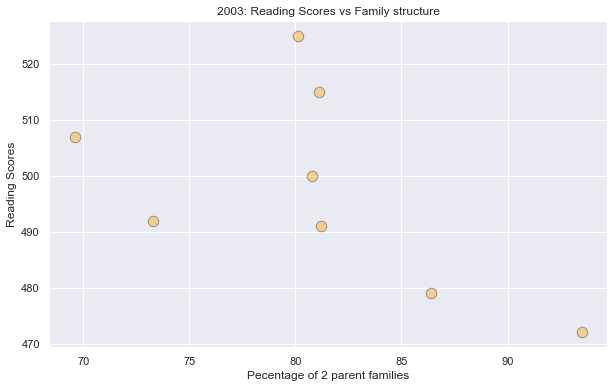

In [60]:
x=pisa[pisa['Year']==2003].Per2parents
y=pisa[pisa['Year']==2003].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2003: Reading Scores vs Family structure')
ax.set_xlabel('Pecentage of 2 parent families')
ax.set_ylabel('Reading Scores')

    
plt.show()

**No clear relationship between family structure and reading scores**

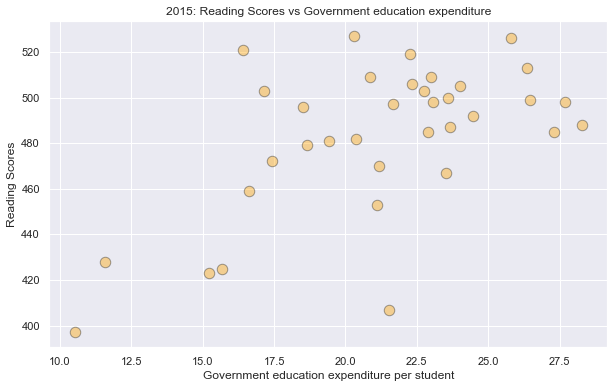

In [61]:
x=pisa[pisa['Year']==2015].GovExpSecondaryEducPerStudent
y=pisa[pisa['Year']==2015].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2015: Reading Scores vs Government education expenditure')
ax.set_xlabel('Government education expenditure per student')
ax.set_ylabel('Reading Scores')

    
plt.show()

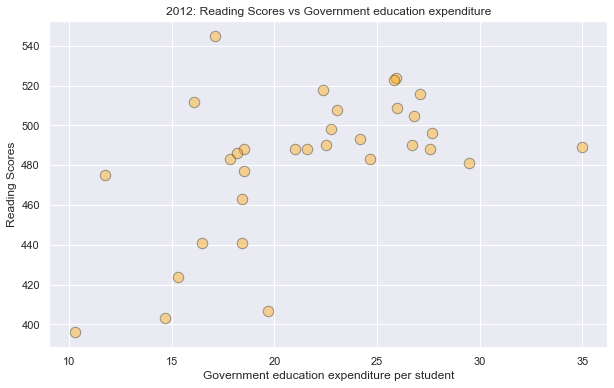

In [62]:
x=pisa[pisa['Year']==2012].GovExpSecondaryEducPerStudent
y=pisa[pisa['Year']==2012].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2012: Reading Scores vs Government education expenditure')
ax.set_xlabel('Government education expenditure per student')
ax.set_ylabel('Reading Scores')

    
plt.show()

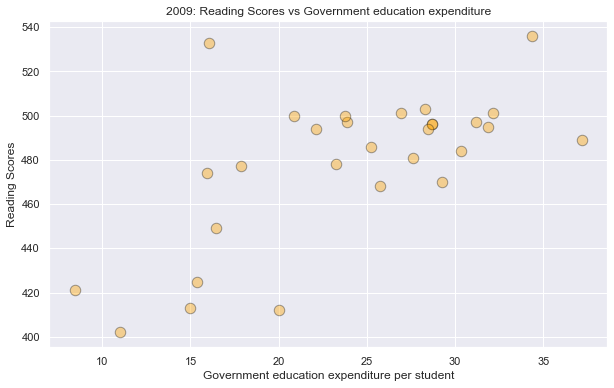

In [63]:
x=pisa[pisa['Year']==2009].GovExpSecondaryEducPerStudent
y=pisa[pisa['Year']==2009].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2009: Reading Scores vs Government education expenditure')
ax.set_xlabel('Government education expenditure per student')
ax.set_ylabel('Reading Scores')

    
plt.show()

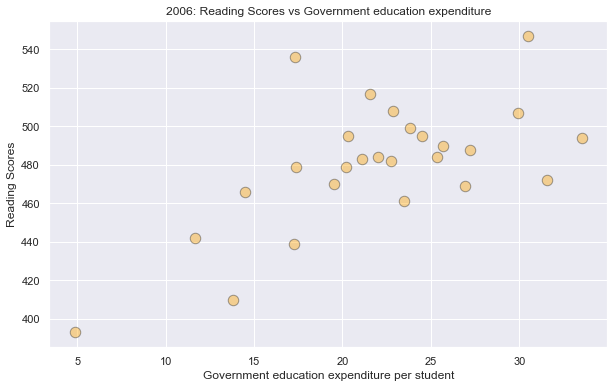

In [64]:
x=pisa[pisa['Year']==2006].GovExpSecondaryEducPerStudent
y=pisa[pisa['Year']==2006].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2006: Reading Scores vs Government education expenditure')
ax.set_xlabel('Government education expenditure per student')
ax.set_ylabel('Reading Scores')

    
plt.show()

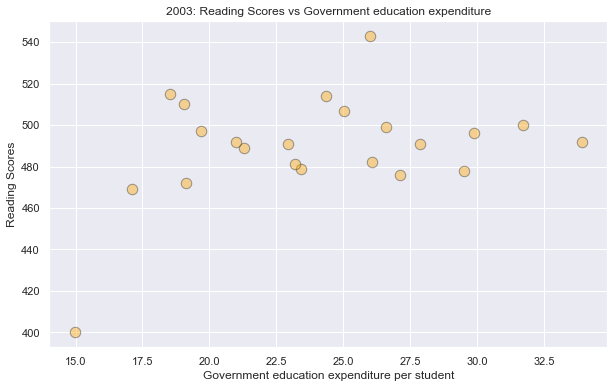

In [65]:
x=pisa[pisa['Year']==2003].GovExpSecondaryEducPerStudent
y=pisa[pisa['Year']==2003].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2003: Reading Scores vs Government education expenditure')
ax.set_xlabel('Government education expenditure per student')
ax.set_ylabel('Reading Scores')

    
plt.show()

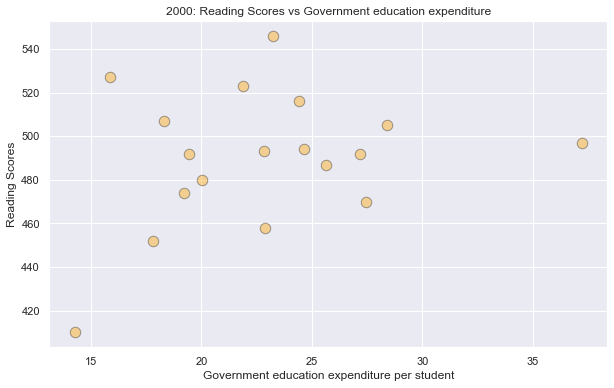

In [66]:
x=pisa[pisa['Year']==2000].GovExpSecondaryEducPerStudent
y=pisa[pisa['Year']==2000].ReadingScoreAvg

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x, y, c='orange', edgecolor='k', alpha=.4, s=110)

ax.set_title('2000: Reading Scores vs Government education expenditure')
ax.set_xlabel('Government education expenditure per student')
ax.set_ylabel('Reading Scores')

    
plt.show()

In [67]:
pisa.head()

,Year,Jurisdiction,CountryCode,Region,ReadingScoreAvg,ReadingScoreFemaleAvg,ReadingScoreMaleAvg,ReadingPublicSchoolsScoresAvg,ReadingNonPublicSchoolsScoresAvg,ReadingICTYes1,...,ScienceICTNo,PerDiffHeritageLang,HighestOccupParentsStatiusIndex,EconSocCulIndex,GDPperCapPPP,IncomeGroup,GovEducExpPercentGDP,GovExpSecondaryEducPerStudent,Per2parents,colors
2,2018,Australia,AUS,East Asia & Pacific,503.0,519.0,487.0,513.0,491.0,477.0,...,521.0,22.8,55.8,0.32,51036.40589,High Income,NaN,NaN,NaN,blue
3,2018,Austria,AUT,Europe & Central Asia,484.0,499.0,471.0,501.0,486.0,444.0,...,505.0,22.6,50.8,0.01,56871.21140,High Income,NaN,NaN,87.9,yellow
4,2018,Belgium,BEL,Europe & Central Asia,493.0,504.0,482.0,NaN,492.0,495.0,...,512.0,20.2,52.4,0.07,52249.57346,High Income,NaN,NaN,73.6,yellow
5,2018,Brazil,BRA,Latin America & Caribbean,413.0,426.0,400.0,NaN,NaN,NaN,...,NaN,NaN,42.2,-1.10,14940.67261,Upper middle income,NaN,NaN,NaN,red
6,2018,B-S-J-G (China),CHN1,East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue


In [68]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 2 to 321
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              308 non-null    int64  
 1   Jurisdiction                      308 non-null    object 
 2   CountryCode                       308 non-null    object 
 3   Region                            308 non-null    object 
 4   ReadingScoreAvg                   281 non-null    float64
 5   ReadingScoreFemaleAvg             281 non-null    float64
 6   ReadingScoreMaleAvg               281 non-null    float64
 7   ReadingPublicSchoolsScoresAvg     177 non-null    float64
 8   ReadingNonPublicSchoolsScoresAvg  179 non-null    float64
 9   ReadingICTYes1                    92 non-null     float64
 10  ReadingICTYes2                    92 non-null     float64
 11  ReadingICTNo                      92 non-null     float64
 12  MathScor

In [69]:
#Created 2018 datset by subsetting pisa dataset
df=pisa[pisa['Year']==2018][['GDPperCapPPP','ReadingScoreAvg','Jurisdiction','HighestOccupParentsStatiusIndex','EconSocCulIndex','GovEducExpPercentGDP','GovExpSecondaryEducPerStudent','Per2parents','PerDiffHeritageLang']]
df

,GDPperCapPPP,ReadingScoreAvg,Jurisdiction,HighestOccupParentsStatiusIndex,EconSocCulIndex,GovEducExpPercentGDP,GovExpSecondaryEducPerStudent,Per2parents,PerDiffHeritageLang
2,51036.40589,503.0,Australia,55.8,0.32,NaN,NaN,NaN,22.8
3,56871.21140,484.0,Austria,50.8,0.01,NaN,NaN,87.9,22.6
4,52249.57346,493.0,Belgium,52.4,0.07,NaN,NaN,73.6,20.2
5,14940.67261,413.0,Brazil,42.2,-1.10,NaN,NaN,NaN,NaN
6,NaN,NaN,B-S-J-G (China),NaN,NaN,NaN,NaN,NaN,NaN
7,15602.94147,555.0,B-S-J-Z (China),48.7,-0.67,NaN,NaN,NaN,0.3
8,50077.79624,520.0,Canada,57.5,0.42,NaN,NaN,NaN,28.5
9,24765.23459,452.0,Chile,43.9,-0.58,NaN,NaN,NaN,6.0
10,14965.89536,412.0,Colombia,41.6,-1.19,NaN,NaN,NaN,4.0
11,40389.35761,490.0,Czech Republic,49.1,-0.21,NaN,NaN,85.9,3.9


In [70]:
# Dropped variables with too few observations
df.drop(['Per2parents', 'GovExpSecondaryEducPerStudent','GovEducExpPercentGDP'], axis=1,inplace=True)

In [71]:
# Made a balanced dataset by dropping NaNs in preparation for regression analysis
df.dropna(inplace=True)
df

,GDPperCapPPP,ReadingScoreAvg,Jurisdiction,HighestOccupParentsStatiusIndex,EconSocCulIndex,PerDiffHeritageLang
2,51036.40589,503.0,Australia,55.8,0.32,22.8
3,56871.21140,484.0,Austria,50.8,0.01,22.6
4,52249.57346,493.0,Belgium,52.4,0.07,20.2
7,15602.94147,555.0,B-S-J-Z (China),48.7,-0.67,0.3
8,50077.79624,520.0,Canada,57.5,0.42,28.5
9,24765.23459,452.0,Chile,43.9,-0.58,6.0
10,14965.89536,412.0,Colombia,41.6,-1.19,4.0
11,40389.35761,490.0,Czech Republic,49.1,-0.21,3.9
12,57218.40645,501.0,Denmark,60.0,0.52,12.9
13,36358.02776,523.0,Estonia,53.5,0.08,5.9


In [72]:
# Number of valid observations
len(df)

37

In [73]:
# Define regresson variables
GDPcap=df.GDPperCapPPP/1000
HOPSI=df.HighestOccupParentsStatiusIndex
ESCI=df.EconSocCulIndex
lang=df.PerDiffHeritageLang
X = np.column_stack((GDPcap,HOPSI,lang))
y=df.ReadingScoreAvg


In [74]:
# Run regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReadingScoreAvg   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     11.23
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           3.12e-05
Time:                        16:55:11   Log-Likelihood:                -171.25
No. Observations:                  37   AIC:                             350.5
Df Residuals:                      33   BIC:                             356.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        335.6761     40.931      8.201      0.000     252.401     418.951
x1             0.4618      0.275      1.682      0.102      -0.097       1.020
x2             2.7922      0.862      3.240      0.003       1.039       4.546
x3            -0.9310      0.372     -2.505      0.017      -1.687      -0.175
==============================================================================
Omnibus:                        6.322   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.336
Skew:                           0.606   Prob(JB):                       0.0694
Kurtosis:                       4.411   Cond. No.                         677.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Of the significant preditors at the 5% level or less, on average a one unit increase in the index of the highest occupational status of the parents increases the reading score by 2.8 points assuming other variables remain constant, while a one percentage increase in the percentage of persons whose heritage language is different to the test language results in 0.93 decrease in the reading score.**

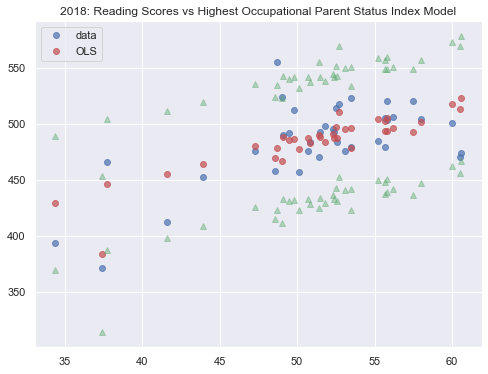

In [75]:
# Visual representation of regression results
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(HOPSI, y, 'o', label="data", alpha=0.7)
ax.plot(HOPSI, results.fittedvalues, 'ro', label="OLS", alpha=0.7)
ax.plot(HOPSI, iv_u, 'g^', alpha=0.4)
ax.plot(HOPSI, iv_l, 'g^', alpha=0.4)
plt.title("2018: Reading Scores vs Highest Occupational Parent Status Index Model")
ax.legend(loc='best');

In [76]:
# Pearson Correlation
corrMatrix = df.corr()
corrMatrix

,GDPperCapPPP,ReadingScoreAvg,HighestOccupParentsStatiusIndex,EconSocCulIndex,PerDiffHeritageLang
GDPperCapPPP,1.000000,0.369445,0.471655,0.544885,0.334587
ReadingScoreAvg,0.369445,1.000000,0.636219,0.635066,-0.309457
HighestOccupParentsStatiusIndex,0.471655,0.636219,1.000000,0.955696,-0.110573
EconSocCulIndex,0.544885,0.635066,0.955696,1.000000,-0.167952
PerDiffHeritageLang,0.334587,-0.309457,-0.110573,-0.167952,1.000000


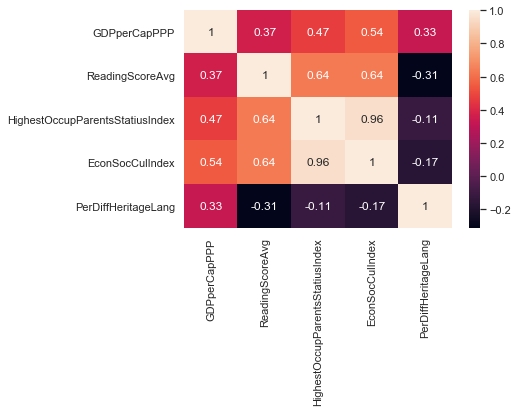

In [77]:
# Correlation Heat Map
sns.heatmap(corrMatrix, annot=True)
plt.savefig('Heatmap of correlations between reading & predictors')
plt.show()

**Readingscores are highly correlated with Economic Social Cultural Index yeilding the best regression model. Our regression results indicate a one unit increase in the index results in a 42 point increase in the score, which is statistically signicant at the 99% level. Note that including all three regressors in the model result in multicollinearity.**

In [78]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 2 to 321
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              308 non-null    int64  
 1   Jurisdiction                      308 non-null    object 
 2   CountryCode                       308 non-null    object 
 3   Region                            308 non-null    object 
 4   ReadingScoreAvg                   281 non-null    float64
 5   ReadingScoreFemaleAvg             281 non-null    float64
 6   ReadingScoreMaleAvg               281 non-null    float64
 7   ReadingPublicSchoolsScoresAvg     177 non-null    float64
 8   ReadingNonPublicSchoolsScoresAvg  179 non-null    float64
 9   ReadingICTYes1                    92 non-null     float64
 10  ReadingICTYes2                    92 non-null     float64
 11  ReadingICTNo                      92 non-null     float64
 12  MathScor

In [79]:
df=pisa[pisa['Year']==2018][['GDPperCapPPP','MathScoresAvg','Jurisdiction','HighestOccupParentsStatiusIndex','EconSocCulIndex','GovEducExpPercentGDP','GovExpSecondaryEducPerStudent','Per2parents','PerDiffHeritageLang']]

df.describe()

,GDPperCapPPP,MathScoresAvg,HighestOccupParentsStatiusIndex,EconSocCulIndex,GovEducExpPercentGDP,GovExpSecondaryEducPerStudent,Per2parents,PerDiffHeritageLang
count,43.000000,43.000000,43.000000,43.000000,1.00000,1.00000,19.000000,38.000000
mean,43435.384747,486.302326,51.204651,-0.144884,3.32652,22.03149,81.631579,15.878947
std,19901.386881,42.601998,6.368746,0.529174,NaN,NaN,6.758702,13.053842
min,11639.865060,379.000000,34.400000,-1.570000,3.32652,22.03149,69.100000,0.300000
25%,31111.684045,481.000000,48.850000,-0.215000,3.32652,22.03149,78.100000,6.425000
50%,41335.523220,495.000000,52.200000,0.000000,3.32652,22.03149,83.900000,12.450000
75%,54101.864215,508.500000,55.700000,0.145000,3.32652,22.03149,86.550000,21.850000
max,116786.480000,591.000000,61.600000,0.550000,3.32652,22.03149,92.100000,66.900000


In [80]:
df.drop(['Per2parents','GovExpSecondaryEducPerStudent','GovEducExpPercentGDP'], axis=1,inplace=True)

In [81]:
df.head()

,GDPperCapPPP,MathScoresAvg,Jurisdiction,HighestOccupParentsStatiusIndex,EconSocCulIndex,PerDiffHeritageLang
2,51036.40589,491.0,Australia,55.8,0.32,22.8
3,56871.21140,499.0,Austria,50.8,0.01,22.6
4,52249.57346,508.0,Belgium,52.4,0.07,20.2
5,14940.67261,384.0,Brazil,42.2,-1.10,NaN
6,NaN,NaN,B-S-J-G (China),NaN,NaN,NaN


In [82]:
df.dropna(inplace=True)

In [83]:
df.describe()

,GDPperCapPPP,MathScoresAvg,HighestOccupParentsStatiusIndex,EconSocCulIndex,PerDiffHeritageLang
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,43938.470791,489.157895,51.197368,-0.125000,15.878947
std,19854.725107,39.372460,6.009789,0.493595,13.053842
min,11639.865060,379.000000,34.400000,-1.570000,0.300000
25%,31642.672125,481.000000,49.025000,-0.210000,6.425000
50%,41309.334700,495.000000,52.050000,0.005000,12.450000
75%,53905.090310,508.750000,55.575000,0.130000,21.850000
max,116786.480000,591.000000,60.600000,0.550000,66.900000


In [84]:
GDPcap=df.GDPperCapPPP/1000
HOPSI=df.HighestOccupParentsStatiusIndex
ESCI=df.EconSocCulIndex
lang=df.PerDiffHeritageLang

X = np.column_stack((HOPSI,lang))
y=df.MathScoresAvg

model = sm.OLS(y, sm.add_constant(HOPSI))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MathScoresAvg   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     16.37
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           0.000264
Time:                        16:55:12   Log-Likelihood:                -185.87
No. Observations:                  38   AIC:                             375.7
Df Residuals:                      36   BIC:                             379.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             301.6309     46.659      6.465      0.000     207.002     396.259
HighestOccupParentsStatiusIndex     3.6628      0.905      4.046      0.000       1.827       5.499
==============================================================================
Omnibus:                       10.665   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               13.866
Skew:                           0.744   Prob(JB):                     0.000975
Kurtosis:                       5.558   Cond. No.                         448.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**In 2018, on average a one unit increase in the Highest Occupational Parent Status Index increases math scores by 3.7 points and it is significant at the 1% confidence level.**

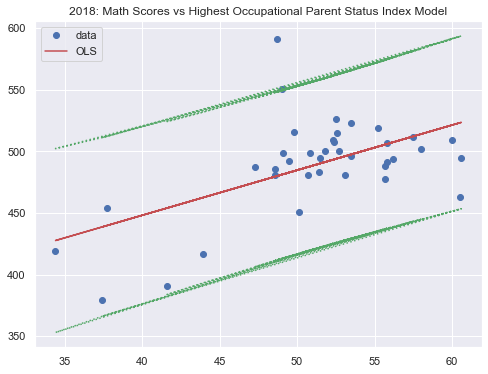

In [85]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(HOPSI, y, 'o', label="data")
ax.plot(HOPSI, results.fittedvalues, 'r-', label="OLS")
ax.plot(HOPSI, iv_u, 'g:')
ax.plot(HOPSI, iv_l, 'g:')
plt.title("2018: Math Scores vs Highest Occupational Parent Status Index Model")
ax.legend(loc='best');

In [86]:
df=pisa[pisa['Year']==2018][['GDPperCapPPP','ScienceScoreAvg','Jurisdiction','HighestOccupParentsStatiusIndex','EconSocCulIndex','GovEducExpPercentGDP','GovExpSecondaryEducPerStudent','Per2parents','PerDiffHeritageLang']]

df.describe()

,GDPperCapPPP,ScienceScoreAvg,HighestOccupParentsStatiusIndex,EconSocCulIndex,GovEducExpPercentGDP,GovExpSecondaryEducPerStudent,Per2parents,PerDiffHeritageLang
count,43.000000,43.000000,43.000000,43.000000,1.00000,1.00000,19.000000,38.000000
mean,43435.384747,485.813953,51.204651,-0.144884,3.32652,22.03149,81.631579,15.878947
std,19901.386881,36.513700,6.368746,0.529174,NaN,NaN,6.758702,13.053842
min,11639.865060,396.000000,34.400000,-1.570000,3.32652,22.03149,69.100000,0.300000
25%,31111.684045,471.500000,48.850000,-0.215000,3.32652,22.03149,78.100000,6.425000
50%,41335.523220,493.000000,52.200000,0.000000,3.32652,22.03149,83.900000,12.450000
75%,54101.864215,504.000000,55.700000,0.145000,3.32652,22.03149,86.550000,21.850000
max,116786.480000,590.000000,61.600000,0.550000,3.32652,22.03149,92.100000,66.900000


In [87]:
df.drop(['Per2parents','GovExpSecondaryEducPerStudent','GovEducExpPercentGDP'], axis=1,inplace=True)

In [88]:
df.head()

,GDPperCapPPP,ScienceScoreAvg,Jurisdiction,HighestOccupParentsStatiusIndex,EconSocCulIndex,PerDiffHeritageLang
2,51036.40589,503.0,Australia,55.8,0.32,22.8
3,56871.21140,490.0,Austria,50.8,0.01,22.6
4,52249.57346,499.0,Belgium,52.4,0.07,20.2
5,14940.67261,404.0,Brazil,42.2,-1.10,NaN
6,NaN,NaN,B-S-J-G (China),NaN,NaN,NaN


In [89]:
df.dropna(inplace=True)
df.describe()

,GDPperCapPPP,ScienceScoreAvg,HighestOccupParentsStatiusIndex,EconSocCulIndex,PerDiffHeritageLang
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,43938.470791,488.131579,51.197368,-0.125000,15.878947
std,19854.725107,33.922942,6.009789,0.493595,13.053842
min,11639.865060,396.000000,34.400000,-1.570000,0.300000
25%,31642.672125,475.500000,49.025000,-0.210000,6.425000
50%,41309.334700,493.000000,52.050000,0.005000,12.450000
75%,53905.090310,504.500000,55.575000,0.130000,21.850000
max,116786.480000,590.000000,60.600000,0.550000,66.900000


In [90]:
GDPcap=df.GDPperCapPPP/1000
HOPSI=df.HighestOccupParentsStatiusIndex
ESCI=df.EconSocCulIndex
lang=df.PerDiffHeritageLang

X = np.column_stack((HOPSI,lang))
y=df.ScienceScoreAvg

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ScienceScoreAvg   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     8.574
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           0.000932
Time:                        16:55:12   Log-Likelihood:                -179.75
No. Observations:                  38   AIC:                             365.5
Df Residuals:                      35   BIC:                             370.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        350.2612     41.613      8.417      0.000     265.782     434.741
x1             2.8656      0.787      3.641      0.001       1.268       4.463
x2            -0.5567      0.362     -1.536      0.133      -1.292       0.179
==============================================================================
Omnibus:                       12.957   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.340
Skew:                           0.825   Prob(JB):                     3.83e-05
Kurtosis:                       6.182   Cond. No.                         485.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

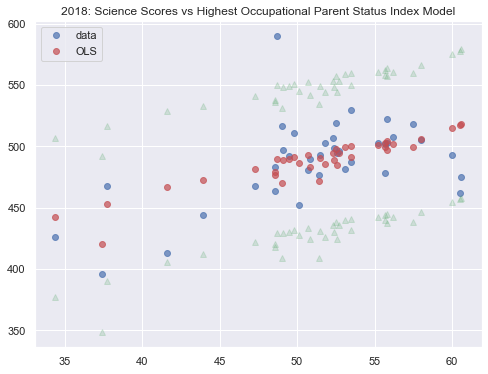

In [91]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(HOPSI, y, 'o', label="data", alpha=0.7)
ax.plot(HOPSI, results.fittedvalues, 'ro', label="OLS", alpha=0.7)
ax.plot(HOPSI, iv_u, 'g^',alpha=0.2)
ax.plot(HOPSI, iv_l, 'g^', alpha=0.2)
plt.title("2018: Science Scores vs Highest Occupational Parent Status Index Model")
ax.legend(loc='best');

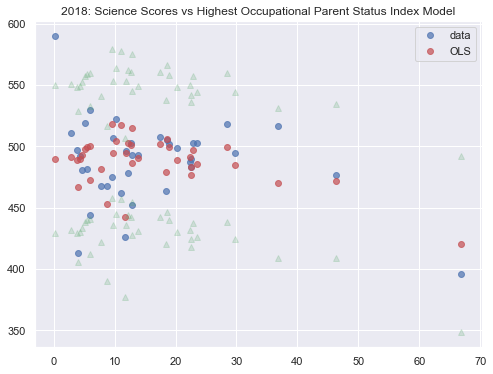

In [92]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(lang, y, 'o', label="data", alpha=0.7)
ax.plot(lang, results.fittedvalues, 'ro', label="OLS", alpha=0.7)
ax.plot(lang, iv_u, 'g^',alpha=0.2)
ax.plot(lang, iv_l, 'g^', alpha=0.2)
plt.title("2018: Science Scores vs Highest Occupational Parent Status Index Model")
ax.legend(loc='best');

**Pooled Regressions Below**

In [93]:
df_updated=pisa.copy()

In [94]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 2 to 321
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              308 non-null    int64  
 1   Jurisdiction                      308 non-null    object 
 2   CountryCode                       308 non-null    object 
 3   Region                            308 non-null    object 
 4   ReadingScoreAvg                   281 non-null    float64
 5   ReadingScoreFemaleAvg             281 non-null    float64
 6   ReadingScoreMaleAvg               281 non-null    float64
 7   ReadingPublicSchoolsScoresAvg     177 non-null    float64
 8   ReadingNonPublicSchoolsScoresAvg  179 non-null    float64
 9   ReadingICTYes1                    92 non-null     float64
 10  ReadingICTYes2                    92 non-null     float64
 11  ReadingICTNo                      92 non-null     float64
 12  MathScor

In [95]:
df_updated.drop(['CountryCode','ReadingScoreAvg','ReadingScoreFemaleAvg','ReadingScoreMaleAvg','ReadingPublicSchoolsScoresAvg','ReadingNonPublicSchoolsScoresAvg','ReadingICTYes1','ReadingICTYes2','ReadingICTNo','MathFemaleScoreAvg','MathMaleScoreAvg','MathPublicSchoolsScoresAvg','MathNonPublicSchoolsScoresAvg','MathICTYes1','MathICTYes2','MathICTNo','ScienceFemaleScoreAvg','ScienceMaleScoreAvg','SciencePublicSchoolsScoresAvg','ScienceNonPublicSchoolsScoresAvg','ScienceICTYes1','ScienceICTYes2','ScienceICTNo'],axis=1,inplace=True)

In [96]:
df_updated.drop(['ScienceScoreAvg','PerDiffHeritageLang','EconSocCulIndex'],axis=1,inplace=True)

In [97]:
df_updated.drop(['GovExpSecondaryEducPerStudent','Per2parents','GovEducExpPercentGDP'],axis=1,inplace=True)

In [98]:
df_updated.describe() # dropped GEEG here b/c it was insigificant and we lost USA

,Year,MathScoresAvg,HighestOccupParentsStatiusIndex,GDPperCapPPP
count,308.000000,248.000000,235.000000,296.000000
mean,2009.000000,485.616935,48.841702,31852.768904
std,6.009764,43.479839,5.589976,16655.959774
min,2000.000000,356.000000,32.700000,4743.944694
25%,2003.000000,477.000000,46.350000,19499.231887
50%,2009.000000,494.000000,49.500000,30054.540680
75%,2015.000000,512.250000,52.300000,40577.169563
max,2018.000000,591.000000,61.800000,116786.480000


In [99]:
df_updated.dropna(inplace=True)

In [100]:
df_updated.describe()

,Year,MathScoresAvg,HighestOccupParentsStatiusIndex,GDPperCapPPP
count,205.000000,205.000000,205.000000,205.000000
mean,2010.448780,485.482927,49.104878,33922.796475
std,5.530092,43.779818,5.618751,16973.412067
min,2003.000000,356.000000,32.700000,5465.264202
25%,2006.000000,476.000000,46.900000,22688.010030
50%,2009.000000,495.000000,49.800000,32219.428750
75%,2015.000000,512.000000,52.500000,41697.077630
max,2018.000000,591.000000,61.800000,116786.480000


In [101]:
# df_updated.drop(['Year'],axis=1,inplace=True)
# corrMatrix = df_updated.corr()

# sns.heatmap(corrMatrix, annot=True)
# plt.savefig('Heatmap of correlations between Math & predictors')
# plt.show()


In [102]:
GDPcap=df_updated.GDPperCapPPP/1000
HOPSI=df_updated.HighestOccupParentsStatiusIndex
#GEEG=df_updated.GovEducExpPercentGDP


X = np.column_stack((GDPcap,HOPSI))
y=df_updated.MathScoresAvg

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MathScoresAvg   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     72.39
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.98e-24
Time:                        16:55:13   Log-Likelihood:                -1009.7
No. Observations:                 205   AIC:                             2025.
Df Residuals:                     202   BIC:                             2035.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        266.1815     22.662     11.746      0.000     221.497     310.866
x1             0.4215      0.172      2.452      0.015       0.083       0.760
x2             4.1748      0.519      8.040      0.000       3.151       5.199
==============================================================================
Omnibus:                        2.059   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.858
Skew:                           0.064   Prob(JB):                        0.395
Kurtosis:                       3.449   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

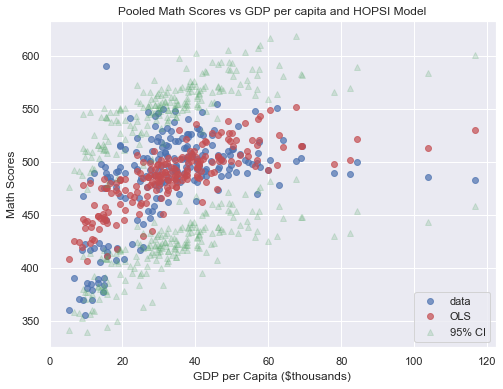

In [103]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(GDPcap, y, 'o', label="data", alpha=.7)
ax.plot(GDPcap, results.fittedvalues, 'ro', label="OLS", alpha=0.7)
ax.plot(GDPcap, iv_u, 'g^', alpha=0.2, label="95% CI")
ax.plot(GDPcap, iv_l, 'g^', alpha=0.2)
ax.set_title('Pooled Math Scores vs GDP per capita and HOPSI Model')
ax.set_xlabel('GDP per Capita ($thousands)')
ax.set_ylabel('Math Scores')

plt.savefig('Pooled Math scores regression results')
ax.legend(loc='best');

**On average over the entire period, GDP per capita and HOPSI are the best predictors of Mathematics scores. A $1000 dollar increase in GDP per capita results in 0.95 unit increase in Math scores assuming other variables remain the same, while a one unit increase in the HOPSI results in an increase 3.6 unit increase in the scores.**

In [104]:
df_updated.tail()

,Year,Jurisdiction,Region,MathScoresAvg,HighestOccupParentsStatiusIndex,GDPperCapPPP,IncomeGroup,colors
271,2003,Switzerland,Europe & Central Asia,527.0,49.3,37713.961380,High Income,yellow
272,2003,Thailand,East Asia & Pacific,417.0,36.0,8863.741036,Upper middle income,blue
273,2003,Turkey,Europe & Central Asia,423.0,41.6,9604.023710,Upper middle income,yellow
274,2003,United Kingdom,Europe & Central Asia,508.0,49.6,30262.055520,High Income,yellow
275,2003,United States,North America,483.0,54.5,39496.485880,High Income,green


In [105]:
df_updated=pisa.copy()

In [106]:
df_updated.drop(['CountryCode','ReadingScoreAvg','ReadingScoreFemaleAvg','ReadingScoreMaleAvg','ReadingPublicSchoolsScoresAvg','ReadingNonPublicSchoolsScoresAvg','ReadingICTYes1','ReadingICTYes2','ReadingICTNo','MathFemaleScoreAvg','MathMaleScoreAvg','MathPublicSchoolsScoresAvg','MathNonPublicSchoolsScoresAvg','MathICTYes1','MathICTYes2','MathICTNo','ScienceFemaleScoreAvg','ScienceMaleScoreAvg','SciencePublicSchoolsScoresAvg','ScienceNonPublicSchoolsScoresAvg','ScienceICTYes1','ScienceICTYes2','ScienceICTNo'],axis=1,inplace=True)

In [107]:
df_updated.drop(['MathScoresAvg','PerDiffHeritageLang','EconSocCulIndex','GovExpSecondaryEducPerStudent','Per2parents','GovEducExpPercentGDP'],axis=1,inplace=True)

In [108]:
df_updated.describe()

,Year,ScienceScoreAvg,HighestOccupParentsStatiusIndex,GDPperCapPPP
count,308.000000,212.000000,235.000000,296.000000
mean,2009.000000,489.080189,48.841702,31852.768904
std,6.009764,38.626394,5.589976,16655.959774
min,2000.000000,382.000000,32.700000,4743.944694
25%,2003.000000,475.000000,46.350000,19499.231887
50%,2009.000000,496.000000,49.500000,30054.540680
75%,2015.000000,513.250000,52.300000,40577.169563
max,2018.000000,590.000000,61.800000,116786.480000


In [109]:
df_updated.dropna(inplace=True)

In [110]:
df_updated.describe()

,Year,ScienceScoreAvg,HighestOccupParentsStatiusIndex,GDPperCapPPP
count,169.000000,169.000000,169.000000,169.000000
mean,2012.035503,487.958580,49.419527,35732.728180
std,4.765818,38.423293,5.723586,17426.552660
min,2006.000000,383.000000,32.700000,6708.575594
25%,2009.000000,475.000000,47.300000,24652.949970
50%,2015.000000,495.000000,50.000000,34636.216430
75%,2018.000000,511.000000,52.700000,44599.820560
max,2018.000000,590.000000,61.800000,116786.480000


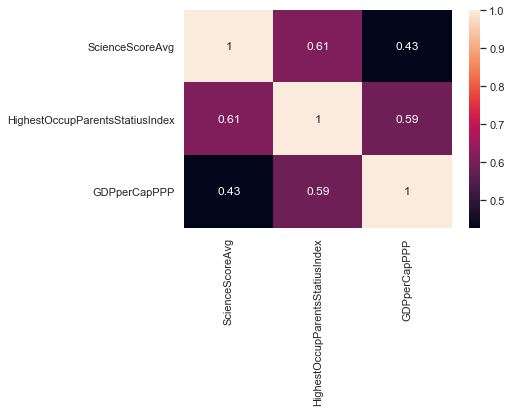

In [111]:
df_updated.drop(['Year'],axis=1,inplace=True)
corrMatrix = df_updated.corr()

sns.heatmap(corrMatrix, annot=True)
plt.savefig('Heatmap of correlations between Science & predictors')
plt.show()

In [112]:
GDPcap=df_updated.GDPperCapPPP/1000
HOPSI=df_updated.HighestOccupParentsStatiusIndex
#GEEG=df_updated.GovEducExpPercentGDP

X = np.column_stack((GDPcap,HOPSI))
y=df_updated.ScienceScoreAvg

model = sm.OLS(y, sm.add_constant(HOPSI))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ScienceScoreAvg   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     100.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           9.15e-19
Time:                        16:55:13   Log-Likelihood:                -816.22
No. Observations:                 169   AIC:                             1636.
Df Residuals:                     167   BIC:                             1643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             284.8282     20.433     13.940      0.000     244.489     325.168
HighestOccupParentsStatiusIndex     4.1103      0.411     10.008      0.000       3.299       4.921
==============================================================================
Omnibus:                        2.185   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.012
Skew:                           0.037   Prob(JB):                        0.366
Kurtosis:                       3.529   Cond. No.                         434.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

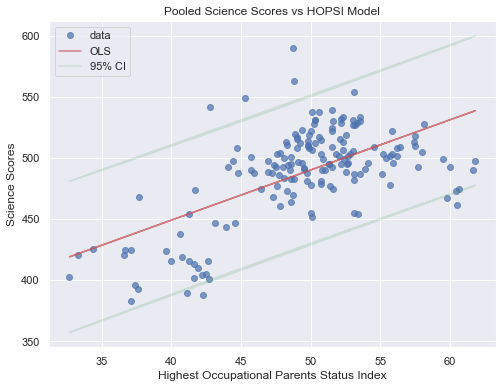

In [113]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(HOPSI, y, 'o', label="data", alpha=0.7)
ax.plot(HOPSI, results.fittedvalues, 'r-', label="OLS", alpha=0.7)
ax.plot(HOPSI, iv_u, 'g-', alpha=0.2, label="95% CI")
ax.plot(HOPSI, iv_l, 'g-', alpha=0.2)
ax.set_title('Pooled Science Scores vs HOPSI Model')
ax.set_xlabel('Highest Occupational Parents Status Index')
ax.set_ylabel('Science Scores')

plt.savefig('science regression model')
ax.legend(loc='best');

In [114]:
df_updated[(df_updated['ScienceScoreAvg']>540) & (df_updated['HighestOccupParentsStatiusIndex']<55)].Jurisdiction

7      B-S-J-Z (China)
152            Finland
156          Hong Kong
198            Finland
202          Hong Kong
Name: Jurisdiction, dtype: object

In [115]:
df_updated[(df_updated['ScienceScoreAvg']<390) & (df_updated['HighestOccupParentsStatiusIndex']>42)].Jurisdiction

194    Colombia
Name: Jurisdiction, dtype: object

In [116]:
df_updated[(df_updated['ScienceScoreAvg']<470) & (df_updated['HighestOccupParentsStatiusIndex']>60)].Jurisdiction

23    Israel
Name: Jurisdiction, dtype: object

In [117]:
df_updated=pisa.copy()

In [118]:
df_updated.drop(['CountryCode','ReadingScoreFemaleAvg','ReadingScoreMaleAvg','ReadingPublicSchoolsScoresAvg','ReadingNonPublicSchoolsScoresAvg','ReadingICTYes1','ReadingICTYes2','ReadingICTNo','MathFemaleScoreAvg','MathMaleScoreAvg','MathPublicSchoolsScoresAvg','MathNonPublicSchoolsScoresAvg','MathICTYes1','MathICTYes2','MathICTNo','ScienceFemaleScoreAvg','ScienceMaleScoreAvg','SciencePublicSchoolsScoresAvg','ScienceNonPublicSchoolsScoresAvg','ScienceICTYes1','ScienceICTYes2','ScienceICTNo'],axis=1,inplace=True)

In [119]:
df_updated.drop(['MathScoresAvg','PerDiffHeritageLang','EconSocCulIndex','GovExpSecondaryEducPerStudent','Per2parents'],axis=1,inplace=True)

In [120]:
df_updated.drop(['ScienceScoreAvg','GovEducExpPercentGDP'],axis=1, inplace=True)

In [121]:
# df_updated.drop(['ScienceScoreAvg'],axis=1, inplace=True)

In [122]:
df_updated.describe()

,Year,ReadingScoreAvg,HighestOccupParentsStatiusIndex,GDPperCapPPP
count,308.000000,281.000000,235.000000,296.000000
mean,2009.000000,484.430605,48.841702,31852.768904
std,6.009764,36.472049,5.589976,16655.959774
min,2000.000000,371.000000,32.700000,4743.944694
25%,2003.000000,472.000000,46.350000,19499.231887
50%,2009.000000,492.000000,49.500000,30054.540680
75%,2015.000000,507.000000,52.300000,40577.169563
max,2018.000000,556.000000,61.800000,116786.480000


In [123]:
df_updated.dropna(inplace=True)

In [124]:
df_updated.describe()

,Year,ReadingScoreAvg,HighestOccupParentsStatiusIndex,GDPperCapPPP
count,232.000000,232.000000,232.000000,232.000000
mean,2009.129310,483.047414,48.856897,32306.854153
std,6.215509,37.070687,5.602376,16879.659464
min,2000.000000,371.000000,32.700000,4743.944694
25%,2003.000000,470.000000,46.375000,19499.231887
50%,2009.000000,492.000000,49.550000,30371.351750
75%,2015.000000,506.000000,52.300000,40391.079010
max,2018.000000,556.000000,61.800000,116786.480000


In [125]:
# df_updated.drop(['Year'],axis=1, inplace=True)
# corrMatrix = df_updated.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.savefig('Heatmap of correlations between reading & predictors')
# plt.show()


In [126]:
GDPcap=df_updated.GDPperCapPPP/1000
HOPSI=df_updated.HighestOccupParentsStatiusIndex
#GEEG=df_updated.GovEducExpPercentGDP


X = np.column_stack((GDPcap,HOPSI))
y=df_updated.ReadingScoreAvg

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ReadingScoreAvg   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     91.04
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           8.05e-30
Time:                        16:55:14   Log-Likelihood:                -1099.0
No. Observations:                 232   AIC:                             2204.
Df Residuals:                     229   BIC:                             2214.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        285.6311     17.576     16.251      0.000     250.999     320.263
x1             0.2812      0.133      2.107      0.036       0.018       0.544
x2             3.8547      0.402      9.586      0.000       3.062       4.647
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.424
Skew:                           0.136   Prob(JB):                        0.491
Kurtosis:                       3.270   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

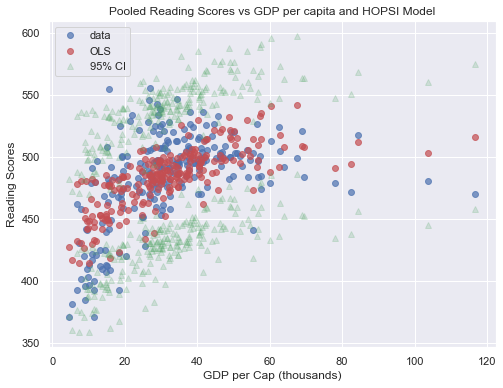

In [127]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(GDPcap, y, 'o', label="data", alpha=0.7)
ax.plot(GDPcap, results.fittedvalues, 'ro', label="OLS", alpha=0.7)
ax.plot(GDPcap, iv_u, 'g^', alpha=0.2, label="95% CI")
ax.plot(GDPcap, iv_l, 'g^', alpha=0.2)
ax.set_title('Pooled Reading Scores vs GDP per capita and HOPSI Model')
ax.set_xlabel('GDP per Cap (thousands)')
ax.set_ylabel('Reading Scores')
plt.savefig('PooledReadingRegressionResults.png')
#plt.title("Pooled Reading Scores vs GDP per capita and HOPSI Model")
ax.legend(loc='best');

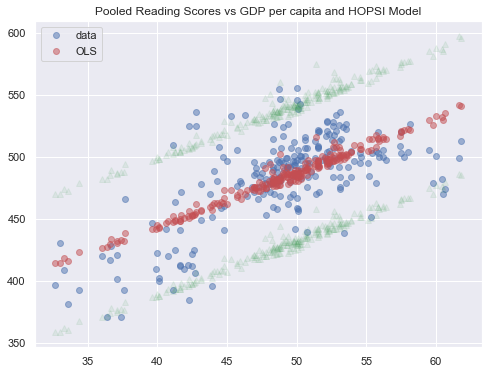

In [128]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(HOPSI, y, 'o', label="data", alpha=0.5)
ax.plot(HOPSI, results.fittedvalues, 'ro', label="OLS", alpha=0.5)
ax.plot(HOPSI, iv_u, 'g^', alpha=0.1)
ax.plot(HOPSI, iv_l, 'g^', alpha=0.1)
plt.title("Pooled Reading Scores vs GDP per capita and HOPSI Model")
ax.legend(loc='best');